In [1]:
# Для анализа данных
import numpy as np
import pandas as pd

# Для графиков
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('auto_complectations.xlsx', sheet_name='Sheet1')

In [3]:
df.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   brand                                                 1703 non-null   object
 1   model                                                 1703 non-null   object
 2   complect                                              1703 non-null   object
 3   type_car                                              1703 non-null   object
 4   seats                                                 1703 non-null   int64 
 5   doors                                                 1703 non-null   int64 
 6   Двигатель                                             1703 non-null   object
 7   Мощность                                              1703 non-null   object
 8   Крутящий момент двигателя                             1703 non-null 

##### 1. Название столбцов желательно привести к  единому виду. Сейчас очень неудобно

In [5]:
df.columns

Index(['brand', 'model', 'complect', 'type_car', 'seats', 'doors', 'Двигатель',
       'Мощность', 'Крутящий момент двигателя', 'Коробка передач', 'Привод',
       'Разгон до сотни', 'Максимальная скорость',
       'Расход топлива (л/100 км)\nгород / трасса / смешанный',
       'Дорожный просвет', 'Габариты (длина × ширина × высота)',
       'Колёсная база', 'Объём багажника', 'Объём багажника максимальный',
       'Объём топливного бака', 'Масса автомобиля'],
      dtype='object')

##### Создадим список англоязычный названий

In [6]:
eng_col_name = ['engine', 'power', 'engine_torque', 'transmission', 'drive_gear',
                '0_100time', 'max_speed', 'fuel_con_CHM', 'G_clearance', 'dimensions_LWH',
                'wheelbase', 'trunk_vol', 'max_trunk_vol','fuel_tank', 'vehicle_weight'
               ] # CHM в fuel_con_CHM - city / highway / mixed, LWH в dimensions_LWH - length × width × height
# Провекра
len(df.columns[6:]) == len(eng_col_name)

True

In [7]:
list_for_trans = []
for col_name in df.columns[6:]:
    list_for_trans.append(col_name)
    
dict_col_name = dict(map(lambda *args: args, list_for_trans, eng_col_name))
# Замена
df = df.rename(dict_col_name, axis='columns')

# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   brand           1703 non-null   object
 1   model           1703 non-null   object
 2   complect        1703 non-null   object
 3   type_car        1703 non-null   object
 4   seats           1703 non-null   int64 
 5   doors           1703 non-null   int64 
 6   engine          1703 non-null   object
 7   power           1703 non-null   object
 8   engine_torque   1703 non-null   object
 9   transmission    1703 non-null   object
 10  drive_gear      1703 non-null   object
 11  0_100time       1703 non-null   object
 12  max_speed       1703 non-null   object
 13  fuel_con_CHM    1703 non-null   object
 14  G_clearance     1703 non-null   object
 15  dimensions_LWH  1703 non-null   object
 16  wheelbase       1703 non-null   object
 17  trunk_vol       1703 non-null   object
 18  max_trun

##### 2. Информация о датасете

- всего 21 колонка

- 1703 строк

- числовой тип в двух колонках. Остальные текстовые, их нужно будет перевести в числовые. (Хотя некоторые алгоритмы классификации могут работать и с текстовыми значениями)

- Значения в колонках "расход топлива" и "габариты" нужно будет разбить на отдельные признаки или превратить в один, используя среднее или сумму и т.д.

##### 2.1 Признак type_car - целевая переменная.

In [8]:
# Какие значения вообще есть у этого признака
# Так-то... в большинстве случаев зная только модель автомобиля можно предсказать его тип кузова
df['type_car'].unique()

array(['Седан класса C', 'Хэтчбек класса B', 'Седан класса D',
       'Универсал повышенной проходимости класса D', 'Универсал класса D',
       'Купе класса D', 'Хэтчбек класса D', 'Седан класса E',
       'Универсал класса E', 'Хэтчбек класса E', 'Седан класса F',
       'Большой кроссовер', 'Компактный кроссовер',
       'Среднеразмерный кроссовер', 'Купе класса C', 'Спорткупе',
       'Кабриолет с мягкой крышей', 'Спорткупе класса D',
       'Спортседан класса E', 'Родстер', 'Большой внедорожник',
       'Седан класса B', 'Хэтчбек класса A', 'Кроссовер класса B', 'Вэн',
       'Горячий хэтчбек класса C', 'Внедорожник класса B',
       'Среднеразмерный внедорожник', 'Хэтчбек класса C',
       'Универсал класса C', 'Спортседан класса D', 'Купе класса E',
       'Пикап', 'Горячий седан класса C', 'Минивэн', 'Компактвэн',
       'Универсал повышенной проходимости класса E'], dtype=object)

Согласно заданию, нужно создать классификатор который будет распозновать 4 класса: 
- Седан 
- Хетчбек 
- Кроссовер 
- Внедорожник.

При этом в датасете присутсвуют и другие варианты типов кузова. Например, "универсал", "кабриолет", "купе" и т.д. Так как данных не очень много удалять эти значения не нужно.

На данный момент принято сделать следующим образом:

- Универсал, купе, кабриолет, родстер, минивен будут отнесены к единому, пятому классу "Другое"

- Пикап отнесен к классу "внедорожник"

Далее вполне можно будет отнести универсалы к хетчбекам (архитектура кузова имеет общие черты, разница в объеме багажника) 
Минивен можно отнести к классу кроссовер, а купе к седанами (однако тут нужно сразу учитыввать, что большинство купе имеют более мощный двигатель чем у обычного седана)


______________________

Сейчас оставим в колонке "type_car" только главный тип кузова без подтипов:


In [9]:
# Напишем функцию для замены названий типов кузова
def rename_type_car(type_car:str):
    '''
    Функция для замены значения в колонке "type_car"
    на класс без подклассов.
    
    На вход принимает строку с названием класса и подкласса
    Возвращает преобразованную строку.
    
    '''
    # Приведем строку к нижнему регистру 
    type_car = type_car.lower()
    
    # Назачение классов, и сразу на английском
    
    if 'седан' in type_car:
        return 'sedan'
    elif 'хэтчбек' in type_car:
        return 'hatchback'
    elif 'кроссовер' in type_car:
        return 'crossover'
    elif 'внедорожник' in type_car or 'пикап' in type_car:
        return 'SUV'
    elif 'купе' in type_car:
        return 'coupe'
    elif 'вэн' in type_car:
        return 'van'
    elif 'универсал' in type_car:
        return 'wagon'
    elif 'родстер' in type_car:
        return 'roadster'
    elif 'кабриолет' in type_car:
        return 'cabriolet'
    else:
        return 'None_type'

In [10]:
df['main_type_car'] = df.loc[:, ('type_car')].apply(lambda x: rename_type_car(x))

In [11]:
# проверим какие значения получились none_tape
df[df['main_type_car'] == 'None_type']

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,max_speed,fuel_con_CHM,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car


Все классы заменились на общий. Оставим пока, что колонку с type_car для анализа.

In [12]:
df['main_type_car'].value_counts()

crossover    754
sedan        416
SUV          200
hatchback    128
van           94
wagon         54
coupe         43
roadster       9
cabriolet      5
Name: main_type_car, dtype: int64

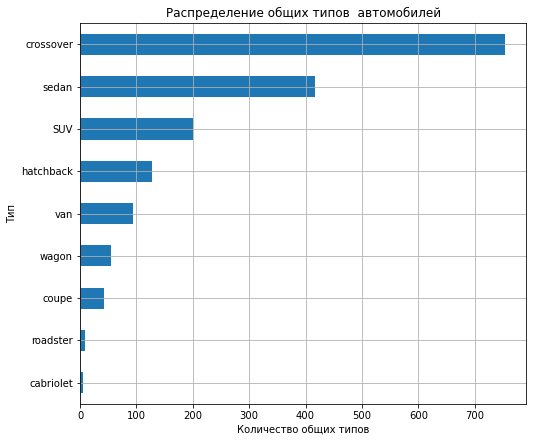

In [13]:
plt.figure(figsize=(8, 7))
plt.title('Распределение общих типов  автомобилей')
df['main_type_car'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Количество общих типов')
plt.ylabel('Тип')
plt.grid(True)

##### 2.2 Признак brend

In [14]:
df['brand'].unique()

array(['Audi', 'BMW', 'Cadillac', 'Chevrolet', 'Citroen', 'Genesis',
       'Infiniti', 'Hyundai', 'Honda', 'Jaguar', 'Jeep', 'KIA',
       'Land Rover', 'Lexus', 'Mazda', 'Mercedes-Benz', 'Mitsubishi',
       'Nissan', 'Opel', 'Peugeot', 'Renault', 'Skoda', 'Subaru',
       'Suzuki', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [15]:
len(df['brand'].unique())

27

Всего представлено 27 марок автомобилей. Среди них:

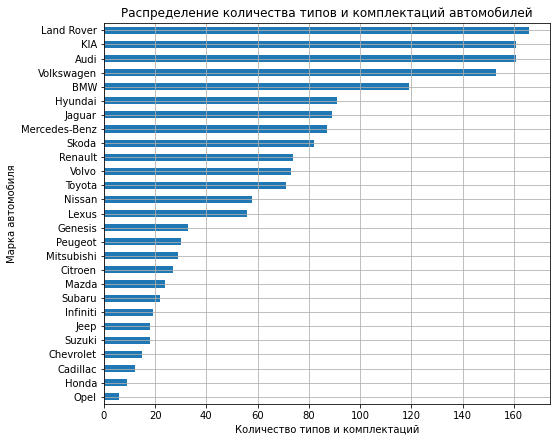

In [16]:
plt.figure(figsize=(8, 7))
plt.title('Распределение количества типов и комплектаций автомобилей')
df['brand'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Количество типов и комплектаций')
plt.ylabel('Марка автомобиля')
plt.grid(True)

##### 2.3 Признак "model"

In [17]:
len(df['model'].unique())

246

Всего 27 марок и 246 моделей:
- так как классификатор будет на основе деревьв, можно закодировать все модели и марки автомобилей с помощью LabelEncoder.

- можно создать из этого фиктивные переменные, посмотреть, что получится. (В случае решения задачи регрессии этот метод был бы предпочтительнее, так как там уже нужно учитывать, что каждая категория имеет свой численный вес.) 

- также стоит рассмотреть создание одного признака из колонок "brand" и  "model" и закодировать его с помощью LabelEncoder.

Более того скорее всего этот признак будет больше всего влиять на классификацию, потому, что определенная модель автомоблия чаще всего имеет единственный тип кузова.

In [20]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
# Кодировка марки авто
df['brand_cod'] = ord_enc.fit_transform(df['brand'])
# Кодировка модели авто
df['model_cod'] = ord_enc.fit_transform(df['model'])



In [21]:
df[df['brand'] == 'BMW'].head(5)

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod
161,BMW,2 Series,218i MT,Купе класса C,5,2,бензиновый (1499 см³),136 л. с.,220 Н·м,механическая (6 ступеней),...,145 мм,4432 × 1774 × 1418,2690 мм,390 л,390 л,52 л,1345 кг,coupe,1,0
162,BMW,2 Series,218i,Купе класса C,5,2,бензиновый (1499 см³),136 л. с.,220 Н·м,автоматическая (8 ступеней),...,145 мм,4432 × 1774 × 1418,2690 мм,390 л,390 л,52 л,1475 кг,coupe,1,0
163,BMW,2 Series,M240i xDrive,Купе класса C,5,2,бензиновый (2998 см³),340 л. с.,500 Н·м,автоматическая (8 ступеней),...,145 мм,4432 × 1774 × 1418,2690 мм,390 л,390 л,52 л,1615 кг,coupe,1,0
164,BMW,2 Series Gran Coupe,218i Online Edition,Седан класса C,5,4,бензиновый (1499 см³),140 л. с.,220 Н·м,роботизированная (7 ступеней),...,145 мм,4526 × 1800 × 1420,2670 мм,430 л,430 л,42 л,1450 кг,sedan,1,1
165,BMW,2 Series Gran Coupe,218i,Седан класса C,5,4,бензиновый (1499 см³),140 л. с.,220 Н·м,роботизированная (7 ступеней),...,145 мм,4526 × 1800 × 1420,2670 мм,430 л,430 л,42 л,1450 кг,sedan,1,1


In [22]:
df[df['brand'] == 'KIA'].head(5)

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod
593,KIA,Ceed,1.4T-GDI Luxe 7AMT,Хэтчбек класса C,5,5,бензиновый (1353 см³),140 л. с.,242 Н·м,роботизированная (7 ступеней),...,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1260 кг,hatchback,11,54
594,KIA,Ceed,1.6 Comfort 6MT,Хэтчбек класса C,5,5,бензиновый (1591 см³),128 л. с.,155 Н·м,механическая (6 ступеней),...,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1204 кг,hatchback,11,54
595,KIA,Ceed,1.4T-GDI Prestige 7AMT,Хэтчбек класса C,5,5,бензиновый (1353 см³),140 л. с.,242 Н·м,роботизированная (7 ступеней),...,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1260 кг,hatchback,11,54
596,KIA,Ceed,1.6 Comfort 6AT,Хэтчбек класса C,5,5,бензиновый (1591 см³),128 л. с.,155 Н·м,автоматическая (6 ступеней),...,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1232 кг,hatchback,11,54
597,KIA,Ceed,1.6 Luxe 6AT,Хэтчбек класса C,5,5,бензиновый (1591 см³),128 л. с.,155 Н·м,автоматическая (6 ступеней),...,150 мм,4310 × 1800 × 1447,2650 мм,395 л,1291 л,50 л,1232 кг,hatchback,11,54


Информация содержащаяся в этой колонке дублируется в других. Чаще всего в комплектации указывают двигатель бензин/дизель, коробка передач, объем двигателя. А дополнение типа "Comfort", "Online Edition" больше относится к внутреннему наполнению автомобиля, что влияет на его цену, но не на тип кузова.
Поэтому этот признак можно удалить.

##### 2.4 Признаки количество мест, дверей

In [23]:
df['seats'].unique()

array([5, 4, 7, 2, 6, 8, 1, 9], dtype=int64)

Посмотрим подробнее

In [24]:
df[df['seats'] > 7 ]['main_type_car'].value_counts()

van          15
crossover     6
SUV           1
Name: main_type_car, dtype: int64

In [25]:
df[df['seats'] ==1 ]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod
1431,Toyota,Hiace,3.0D MT Standart,Вэн,1,3,дизельный (2755 см³),150 л. с.,420 Н·м,механическая (6 ступеней),...,185 мм,5915 × 1950 × 2280,3860 мм,0 л,1935 л,70 л,2125 кг,van,24,102


Более 7 мест в машинах таких типов (van, crossover,SUV) действиетельно есть. А вот 1 место в Toyota Hiace скорее ошибка. Хотя это микроавтобус и там может быть только место видителя, например. Однако это значение мы исправим на 9 как у других автомобилей такой марки и модели. 

In [26]:
df.loc[1431, 'seats'] = 9

In [27]:
df['doors'].unique()

array([4, 5, 2, 7, 8, 6, 3], dtype=int64)

4 и больше 5 дверей это уже подозрительно. Заменим количество дверей больше 5 и если дверей 4 на 5 дверей.

In [28]:
df['doors'] = df['doors'].apply(lambda x : 5 if x > 5 or x == 4 else x)

In [29]:
df['doors'].unique()

array([5, 2, 3], dtype=int64)

In [30]:
# Посмотрим на машины с 2 дверьми
df[df['doors'] == 2]['main_type_car'].value_counts()

coupe        43
roadster      9
cabriolet     5
SUV           3
Name: main_type_car, dtype: int64

3 внедорожника с 2 дверьми, посомрим ближе.

In [31]:
df[(df['doors'] == 2) & (df['main_type_car'] == 'SUV')]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod
587,Jeep,Wrangler 2D,2.0 AT8 Sport,Внедорожник класса B,4,2,бензиновый (1995 см³),272 л. с.,400 Н·м,автоматическая (8 ступеней),...,246 мм,4334 × 1894 × 1858,2459 мм,142 л,430 л,66 л,1819 кг,SUV,10,215
588,Jeep,Wrangler 2D,2.0 AT8 Sahara,Внедорожник класса B,4,2,бензиновый (1995 см³),272 л. с.,400 Н·м,автоматическая (8 ступеней),...,246 мм,4334 × 1894 × 1878,2459 мм,142 л,430 л,66 л,1819 кг,SUV,10,215
589,Jeep,Wrangler 2D,2.0 AT8 Rubicon,Внедорожник класса B,4,2,бензиновый (1995 см³),272 л. с.,400 Н·м,автоматическая (8 ступеней),...,246 мм,4334 × 1894 × 1879,2459 мм,142 л,430 л,66 л,1819 кг,SUV,10,215


У Jeep Wrangler могут быть комплектации с 2 дверьми...

In [32]:
# Посмотрим на машины с 3 дверьми
df[df['doors'] == 3]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,G_clearance,dimensions_LWH,wheelbase,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod
1388,Suzuki,Jimny,GL MT,Внедорожник класса B,4,3,бензиновый (1462 см³),102 л. с.,130 Н·м,механическая (5 ступеней),...,210 мм,3650 × 1645 × 1725,2250 мм,85 л,830 л,40 л,1090 кг,SUV,23,108
1389,Suzuki,Jimny,GL AT,Внедорожник класса B,4,3,бензиновый (1462 см³),102 л. с.,130 Н·м,автоматическая (4 ступеней),...,210 мм,3650 × 1645 × 1725,2250 мм,85 л,830 л,40 л,1110 кг,SUV,23,108
1390,Suzuki,Jimny,GLX AT,Внедорожник класса B,4,3,бензиновый (1462 см³),102 л. с.,130 Н·м,автоматическая (4 ступеней),...,210 мм,3650 × 1645 × 1725,2250 мм,85 л,830 л,40 л,1110 кг,SUV,23,108
1431,Toyota,Hiace,3.0D MT Standart,Вэн,9,3,дизельный (2755 см³),150 л. с.,420 Н·м,механическая (6 ступеней),...,185 мм,5915 × 1950 × 2280,3860 мм,0 л,1935 л,70 л,2125 кг,van,24,102


У Suzuki Jimny действительно 3 двери, а вот у Toyota Hiace - 5.

In [33]:
df.loc[1431, 'doors'] = 5

In [34]:
df['doors'].unique()

array([5, 2, 3], dtype=int64)

In [35]:
df['seats'].unique()

array([5, 4, 7, 2, 6, 8, 9], dtype=int64)

##### 2.5 признак "engine"	

На основе этогопризнака будут созданы 2 других "тип двигателя" и "объем двигателя"

In [36]:
df['engine']

0       бензиновый (1395 см³)
1       бензиновый (1395 см³)
2       бензиновый (1984 см³)
3       бензиновый (1984 см³)
4       бензиновый (1984 см³)
                ...          
1698     дизельный (1969 см³)
1699    бензиновый (1969 см³)
1700     дизельный (1969 см³)
1701     гибридный (1969 см³)
1702     гибридный (1969 см³)
Name: engine, Length: 1703, dtype: object

In [37]:
# напишем функцию, с помощью которой будем доставать тип двигтаеля и его объем
def get_engine_info(value_in_row:str, volume=False):
    '''
    Функция которая возвращает тип двигтаеля и его объем (volume=True)
    
    '''
    
    engine_list = value_in_row.split(' ') # преобразуем строку в список значений, разделитель "пробел"
    
    if volume:
        engin_volume = engine_list[1].replace('(', '') # Достаем значения объема и убираем ненужную скобку
        engin_volume = float(engin_volume) # переводим в числовой вид
        return engin_volume
    
    engin_type = engine_list[0]
    
    return engin_type

In [38]:
df['engin_type'] = df.loc[:, ('engine')].apply(lambda x : get_engine_info(x))

In [39]:
df['engin_type'].unique()

array(['бензиновый', 'дизельный', 'электрический', 'гибридный'],
      dtype=object)

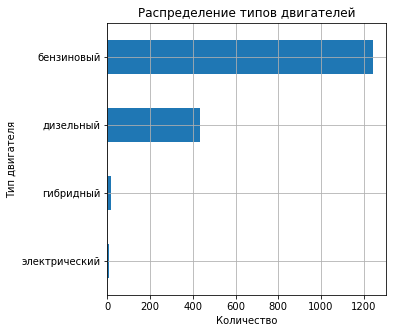

In [40]:
plt.figure(figsize=(5, 5))
plt.title('Распределение типов двигателей')
df['engin_type'].value_counts(ascending=True).plot(kind='barh')
plt.xlabel('Количество')
plt.ylabel('Тип двигателя')
plt.grid(True)

В итоге у нас есть автомобили с 4 типами двигателя. Большинстов, конечно же, бензиноввые. Гибриды и электромоторы в подавляющем меньшенстве.

Кодируем тип двигателя с помощью LabelEncoder.

In [42]:
# Кодировка модели авто
df['engin_type_cod'] = ord_enc.fit_transform(df['engin_type'])

In [43]:
df['engin_type_cod'].unique()

array([0, 2, 3, 1])

In [44]:
# Создаем колонку объем двигателя
df['engin_volume'] = df.loc[:, ('engine')].apply(lambda x : get_engine_info(x, volume=True)) # Указываем True для объема

<AxesSubplot:>

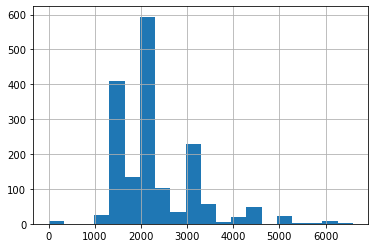

In [45]:
df['engin_volume'].hist(bins=20)

Почти нормальное распределение. Но деревья не требовательны к форме распределения.
У нас есть значения около 0, нужно посмотреть подробнее:

In [46]:
df[df['engin_volume'] < 1000 ]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod,engin_type,engin_type_cod,engin_volume
117,Audi,e-tron,55 quattro,Большой кроссовер,5,5,электрический (0 см³),408 л. с.,664 Н·м,автоматическая (1 ступеней),...,660 л,1725 л,0 л,2555 кг,crossover,0,242,электрический,3,0.0
118,Audi,e-tron,Advance 55 quattro,Большой кроссовер,5,5,электрический (0 см³),408 л. с.,664 Н·м,автоматическая (1 ступеней),...,660 л,1725 л,0 л,2555 кг,crossover,0,242,электрический,3,0.0
119,Audi,e-tron,Design 55 quattro,Большой кроссовер,5,5,электрический (0 см³),408 л. с.,664 Н·м,автоматическая (1 ступеней),...,660 л,1725 л,0 л,2555 кг,crossover,0,242,электрический,3,0.0
120,Audi,e-tron,Sport 55 quattro,Большой кроссовер,5,5,электрический (0 см³),408 л. с.,664 Н·м,автоматическая (1 ступеней),...,660 л,1725 л,0 л,2555 кг,crossover,0,242,электрический,3,0.0
217,BMW,i3,Base,Хэтчбек класса B,5,5,электрический (0 см³),170 л. с.,250 Н·м,автоматическая (1 ступеней),...,260 л,1100 л,0 л,1710 кг,hatchback,1,243,электрический,3,0.0
218,BMW,i3,S,Хэтчбек класса B,5,5,электрический (0 см³),184 л. с.,270 Н·м,автоматическая (1 ступеней),...,260 л,1100 л,0 л,1730 кг,hatchback,1,243,электрический,3,0.0
540,Jaguar,I-Pace,EV400 S,Среднеразмерный кроссовер,5,5,электрический (0 см³),400 л. с.,696 Н·м,автоматическая (0 ступеней),...,656 л,1453 л,0 л,2133 кг,crossover,9,105,электрический,3,0.0
541,Jaguar,I-Pace,EV400 SE,Среднеразмерный кроссовер,5,5,электрический (0 см³),400 л. с.,696 Н·м,автоматическая (0 ступеней),...,656 л,1453 л,0 л,2133 кг,crossover,9,105,электрический,3,0.0
542,Jaguar,I-Pace,EV400 HSE,Среднеразмерный кроссовер,5,5,электрический (0 см³),400 л. с.,696 Н·м,автоматическая (0 ступеней),...,656 л,1453 л,0 л,2133 кг,crossover,9,105,электрический,3,0.0
644,KIA,Picanto 5D,Classic 1.0 MT,Хэтчбек класса A,5,5,бензиновый (998 см³),67 л. с.,95 Н·м,механическая (5 ступеней),...,255 л,1010 л,35 л,885 кг,hatchback,11,145,бензиновый,0,998.0


In [47]:
df[df['engin_volume'] > 6000 ]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod,engin_type,engin_type_cod,engin_volume
208,BMW,7 Series Sedan,M760Li xDrive,Седан класса F,5,5,бензиновый (6592 см³),609 л. с.,800 Н·м,автоматическая (8 ступеней),...,515 л,515 л,78 л,2180 кг,sedan,1,13,бензиновый,0,6592.0
282,Cadillac,Escalade,Luxury,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,430 л,2667 л,98 л,2649 кг,SUV,2,73,бензиновый,0,6162.0
283,Cadillac,Escalade,Luxury ESV,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,1113 л,3424 л,117 л,2739 кг,SUV,2,73,бензиновый,0,6162.0
284,Cadillac,Escalade,Premium,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,430 л,2667 л,98 л,2649 кг,SUV,2,73,бензиновый,0,6162.0
285,Cadillac,Escalade,Premium ESV,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,1113 л,3424 л,117 л,2739 кг,SUV,2,73,бензиновый,0,6162.0
286,Cadillac,Escalade,Platinum,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,430 л,2667 л,98 л,2649 кг,SUV,2,73,бензиновый,0,6162.0
287,Cadillac,Escalade,Platinum ESV,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,1113 л,3424 л,117 л,2739 кг,SUV,2,73,бензиновый,0,6162.0
303,Chevrolet,Tahoe,LT,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,433 л,2680 л,98 л,2549 кг,SUV,3,199,бензиновый,0,6162.0
304,Chevrolet,Tahoe,Premier,Большой внедорожник,7,5,бензиновый (6162 см³),426 л. с.,610 Н·м,автоматическая (8 ступеней),...,433 л,2680 л,98 л,2549 кг,SUV,3,199,бензиновый,0,6162.0
582,Jeep,Grand Cherokee SRT8,6.4 AT8,Большой кроссовер,5,5,бензиновый (6417 см³),468 л. с.,624 Н·м,автоматическая (8 ступеней),...,782 л,1554 л,94 л,2347 кг,crossover,10,99,бензиновый,0,6417.0


Электрический двигатель не имеет рабочегообъема, это не выброс. А KIA Picanto имеет двигатель объемом 998 куб см. 

Двигатели с большим объемом вопрсоов не вызывают, так как соответствуют марке и модели. 

##### 2.6 Признак "power"

Достанем мощность и "оцифруем" ее

In [48]:
# Напишем универсальную функцию для добычи цифровых значений из строковых переменных
def convert_str_to_float(value_in_row:str):
    '''
    Функция для извлечения цифровых значений из строковых переменных
    
    '''
    
    conv_value = value_in_row.split(' ')
    conv_value = int(conv_value[0])
    
    return conv_value
    

In [50]:
df['power'] = df.loc[:, ('power')].apply(lambda x : convert_str_to_float(x))

<AxesSubplot:>

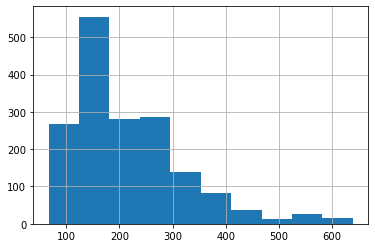

In [51]:
df['power'].hist()

In [52]:
df['power'].describecribe()

count    1703.000000
mean      214.372871
std       102.459760
min        67.000000
25%       150.000000
50%       186.000000
75%       249.000000
max       639.000000
Name: power, dtype: float64

Сейчас можно посмотреть зависимость мощности авто от объема его двигателя:

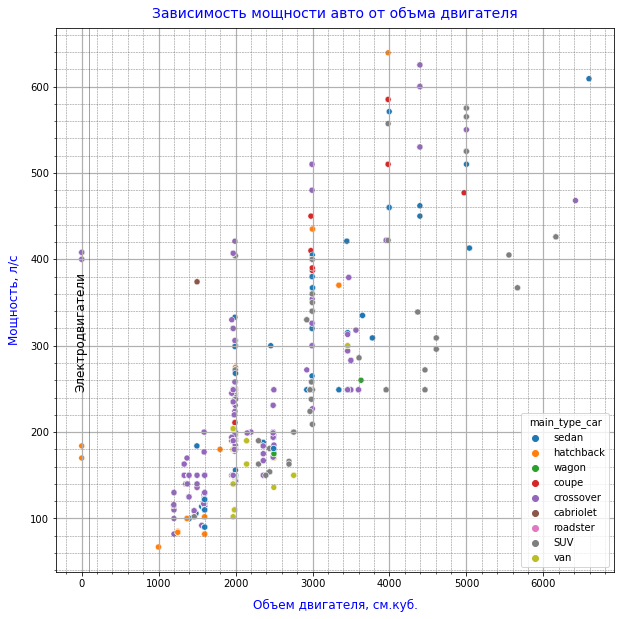

In [150]:
# Создаем полотно
plt.figure(figsize=(10, 10))
#plt.scatter(df['engin_volume'], df['power'])
sns.scatterplot(data=df, x='engin_volume', y='power', hue='main_type_car')
# Название осей
plt.xlabel('Объем двигателя, см.куб.', fontsize=12, color='blue', labelpad=10)
plt.ylabel('Мощность, л/с', fontsize=12, color='blue', labelpad=10)
# Название графика
plt.title('Зависимость мощности авто от объма двигателя', fontsize=14, color='blue', pad=10)
# Параметры сетки
plt.grid(which='major', linewidth=1.2) # Главная 
plt.grid(which='minor', linestyle='--', color='gray', linewidth=0.5) # Вспомогательная
plt.minorticks_on() # Включить показ минорной сетки
# Добавление линии (горизонтальной) на график
plt.axvline(x=100., ymin=0, ymax=1, linewidth=0.5, color='r')
# Добавление текста 
plt.text(-90., 250, 'Электродвигатели', fontsize=12, rotation=90);

Очевидно, что мощность будет расти с увеличением объема двигателя. Какой-то явной зависимости типа кузова от объема двигателя не наблюдается.

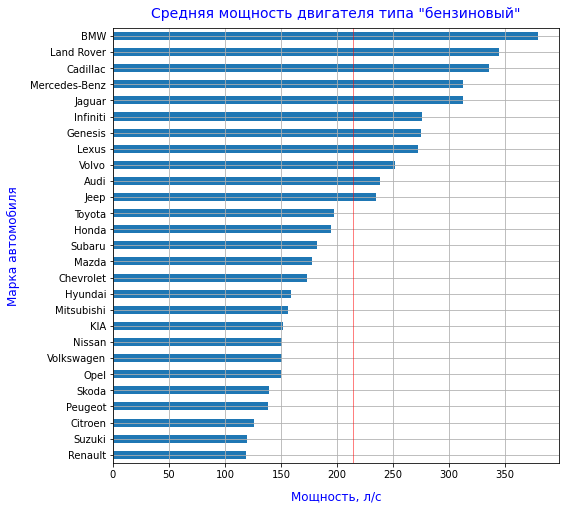

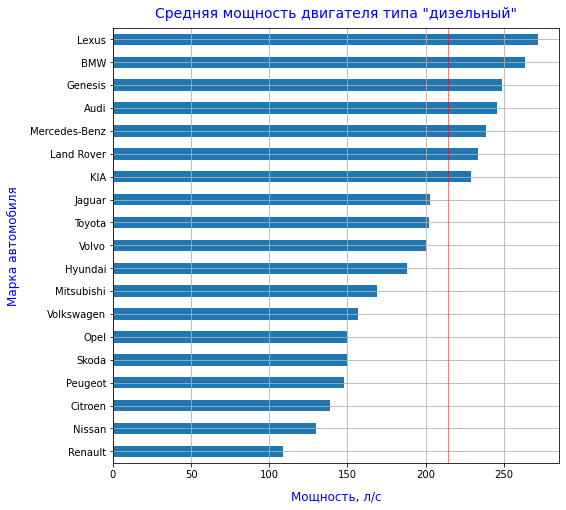

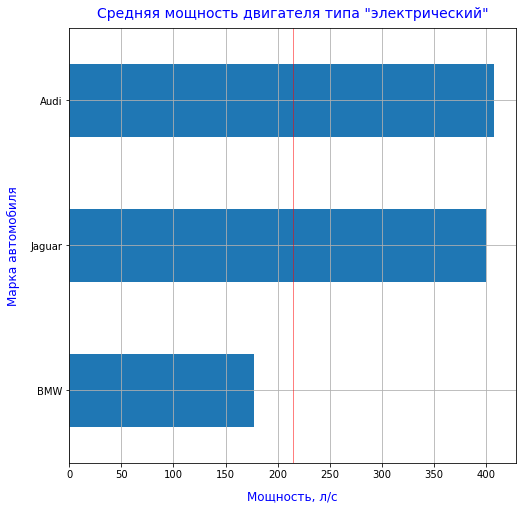

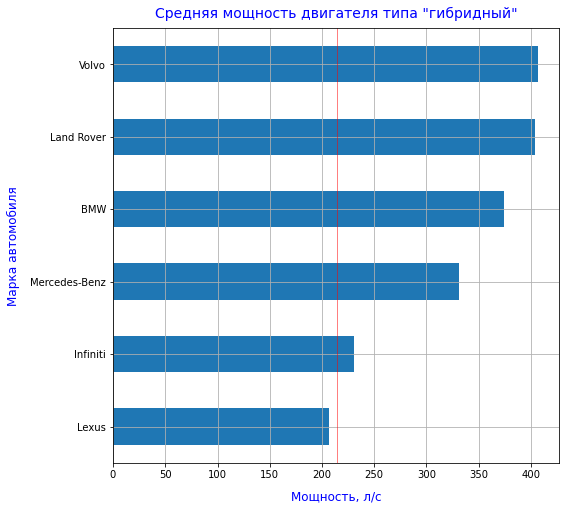

In [101]:
for eng_type in df['engin_type'].unique():
    plt.figure(figsize=(8, 8))
    df[df['engin_type'] == eng_type].groupby(['brand'])['power'].mean().sort_values(ascending=True).plot(kind='barh')
    plt.xlabel('Мощность, л/с', fontsize=12, color='blue', labelpad=10)
    plt.ylabel('Марка автомобиля', fontsize=12, color='blue', labelpad=10)
    plt.axvline(x=df['power'].mean(), ymin=0, ymax=1, label='Средняяj,общая мощность', linewidth=0.5, color='r')
    # Название графика
    plt.title('Средняя мощность двигателя типа "{}"'.format(eng_type), fontsize=14, color='blue', pad=10);
    plt.grid(True)

Гибридные и электрические двигатели почти у всех (из представленных) автомоблией имеют среднюю мощность выше, чем срденяя по всем авто. 40.7% авто с бензиновыми двигателями имеют мощность больше средней по всем авто. И 36.8% авто с бензиновыми двигателями имеют мощность больше средней по всем авто.

##### 2.7 признак "engine_torque"

In [133]:
#  Переведем в числовую категорию
df['engine_torque'] = df.loc[:, ('engine_torque')].apply(lambda x: convert_str_to_float(x))

<AxesSubplot:>

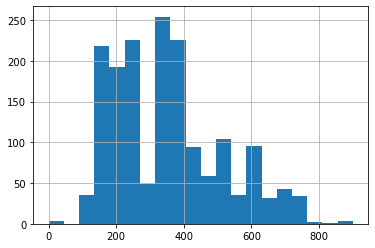

In [136]:
df['engine_torque'].hist(bins=20)

In [137]:
df['engine_torque'].describe()

count    1703.000000
mean      349.022901
std       161.896164
min         0.000000
25%       213.000000
50%       340.000000
75%       439.500000
max       900.000000
Name: engine_torque, dtype: float64

In [139]:
df[df['engine_torque'] == 900]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod,engin_type,engin_type_cod,engin_volume
159,Audi,SQ7,4.0 TDI tiptronic quattro,Большой кроссовер,5,5,дизельный (3956 см³),422,900,автоматическая (8 ступеней),...,803 л,2050 л,85 л,2375 кг,crossover,0,180,дизельный,2,3956.0
160,Audi,SQ8,4.0 TDI tiptronic quattro,Большой кроссовер,5,5,дизельный (3956 см³),422,900,автоматическая (8 ступеней),...,605 л,1755 л,85 л,2360 кг,crossover,0,181,дизельный,2,3956.0
1072,Mercedes-Benz,GT AMG Liftback,63 S 4MATIC+ OS,Хэтчбек класса E,5,5,бензиновый (3982 см³),639,900,роботизированная (9 ступеней),...,456 л,456 л,68 л,2025 кг,hatchback,15,95,бензиновый,0,3982.0


У Mercedes-Benz	GT AMG кртящий момент такой быть может, на счет Audi сомневаюсь... Но оставим так.

In [141]:
df[df['engine_torque'] < 100]

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod,engin_type,engin_type_cod,engin_volume
300,Chevrolet,Spark,L AT,Хэтчбек класса A,5,5,бензиновый (1249 см³),85,0,автоматическая (4 ступеней),...,170 л,170 л,35 л,1054 кг,hatchback,3,193,бензиновый,0,1249.0
301,Chevrolet,Spark,LS AT,Хэтчбек класса A,5,5,бензиновый (1249 см³),85,0,автоматическая (4 ступеней),...,170 л,170 л,35 л,1054 кг,hatchback,3,193,бензиновый,0,1249.0
302,Chevrolet,Spark,LT AT,Хэтчбек класса A,5,5,бензиновый (1249 см³),85,0,автоматическая (4 ступеней),...,170 л,170 л,35 л,1054 кг,hatchback,3,193,бензиновый,0,1249.0
644,KIA,Picanto 5D,Classic 1.0 MT,Хэтчбек класса A,5,5,бензиновый (998 см³),67,95,механическая (5 ступеней),...,255 л,1010 л,35 л,885 кг,hatchback,11,145,бензиновый,0,998.0
645,KIA,Picanto 5D,Comfort 1.0 MT,Хэтчбек класса A,5,5,бензиновый (998 см³),67,95,механическая (5 ступеней),...,255 л,1010 л,35 л,885 кг,hatchback,11,145,бензиновый,0,998.0


Какой крутящий момент у Chevrolet Spark	= 113 (данные из Инета). Заменим.

In [143]:
for ind in range(300, 303):
    df.loc[ind, 'engine_torque'] = 113

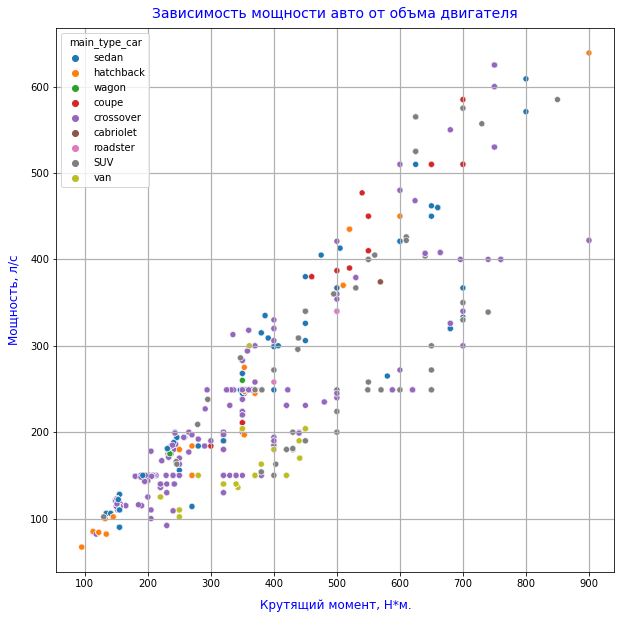

In [152]:
# Создаем полотно
plt.figure(figsize=(10, 10))
#plt.scatter(df['engin_volume'], df['power'])
sns.scatterplot(data=df, x='engine_torque', y='power', hue='main_type_car')
# Название осей
plt.xlabel('Крутящий момент, Н*м.', fontsize=12, color='blue', labelpad=10)
plt.ylabel('Мощность, л/с', fontsize=12, color='blue', labelpad=10)
# Название графика
plt.title('Зависимость мощности авто от объма двигателя', fontsize=14, color='blue', pad=10)
# Параметры сетки
plt.grid(which='major', linewidth=1.2) # Главная 
plt.grid(which='minor', linestyle='--', color='gray', linewidth=0.5) # Вспомогательная
#plt.minorticks_on(); # Включить показ минорной сетки

In [159]:
df[['power', 'engine_torque']].corr()

,power,engine_torque
power,1.000000,0.838813
engine_torque,0.838813,1.000000


Зависимость крутящего момента от мощности двигателя имеется. Положитльная, высокая 0.83 корреляция. 
Также можно заметить, что минивены и некоторые внедорожники имеют крутящий момент больше чем другие типы кузовов при одинаковой мощности. Это как раз говорит о том, что тип корпуса автомобиля имеет зависимость с крутящим ммоентом и мощностью. Минивены и внедорожники более грузоподъемны и им необходим высокий крутящий момент для езды гружеными, например. В случае же седанов высокий крутящйи момент использует для максимально быстрого достижения высокой скорости. 

In [161]:
df

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod,engin_type,engin_type_cod,engin_volume
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,5,бензиновый (1395 см³),150,250,роботизированная (7 ступеней),...,425 л,880 л,50 л,1320 кг,sedan,0,20,бензиновый,0,1395.0
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,5,бензиновый (1395 см³),150,250,роботизированная (7 ступеней),...,425 л,880 л,50 л,1320 кг,sedan,0,20,бензиновый,0,1395.0
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,5,бензиновый (1984 см³),190,320,роботизированная (7 ступеней),...,425 л,880 л,50 л,1395 кг,sedan,0,20,бензиновый,0,1984.0
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,5,бензиновый (1984 см³),190,320,роботизированная (7 ступеней),...,390 л,845 л,55 л,1465 кг,sedan,0,20,бензиновый,0,1984.0
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,5,бензиновый (1984 см³),190,320,роботизированная (7 ступеней),...,425 л,880 л,50 л,1395 кг,sedan,0,20,бензиновый,0,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Volvo,XC90,D5 AT 5S R-Design,Большой кроссовер,5,5,дизельный (1969 см³),235,480,автоматическая (8 ступеней),...,721 л,1899 л,71 л,1969 кг,crossover,26,232,дизельный,2,1969.0
1699,Volvo,XC90,T6 AT 7S R-Design,Большой кроссовер,7,5,бензиновый (1969 см³),320,400,автоматическая (8 ступеней),...,692 л,1899 л,71 л,2004 кг,crossover,26,232,бензиновый,0,1969.0
1700,Volvo,XC90,D5 AT 7S R-Design,Большой кроссовер,7,5,дизельный (1969 см³),235,480,автоматическая (8 ступеней),...,692 л,1899 л,71 л,2009 кг,crossover,26,232,дизельный,2,1969.0
1701,Volvo,XC90,T8 AT 7S Inscription,Большой кроссовер,7,5,гибридный (1969 см³),407,640,автоматическая (8 ступеней),...,640 л,1899 л,70 л,2350 кг,crossover,26,232,гибридный,1,1969.0


##### 2.8 признак "transmission"

In [162]:
df['transmission'].unique()

array(['роботизированная (7 ступеней)', 'автоматическая (8 ступеней)',
       'автоматическая (1 ступеней)', 'роботизированная (6 ступеней)',
       'механическая (6 ступеней)', 'автоматическая (6 ступеней)',
       'автоматическая (10 ступеней)', 'автоматическая (9 ступеней)',
       'механическая (5 ступеней)', 'автоматическая (4 ступеней)',
       'автоматическая (7 ступеней)', 'вариатор (0 ступеней)',
       'автоматическая (5 ступеней)', 'роботизированная (8 ступеней)',
       'автоматическая (0 ступеней)', 'роботизированная (9 ступеней)'],
      dtype=object)

Количесвто ступеней да и в целом коробка передач скорее всего не оказывает какого-то влияния на корпус авто, и больше относится к комплектации и следоватльно цене авто. Ведь и седан как и внедорожник могут быть на автомате или механике. Но надо посмотреть.

Выделим только тип коробки передачбез количества скоростей.

In [164]:
# Напишем универсальную функцию для добычи цифровых значений из строковых переменных
def convert_str_to_other(value_in_row:str, txt_format=False):
    '''
    Функция для извлечения цифровых значений из строковых переменных
    
    '''
    if txt_format:
        conv_value = value_in_row.split(' ')
        conv_value = conv_value[0]
        return conv_value
    conv_value = value_in_row.split(' ')
    conv_value = int(conv_value[0])
    
    return conv_value

In [165]:
df['transmission'] = df.loc[:, ('transmission')].apply(lambda x: convert_str_to_other(x, txt_format=True))

In [167]:
df['transmission'].unique()

array(['роботизированная', 'автоматическая', 'механическая', 'вариатор'],
      dtype=object)

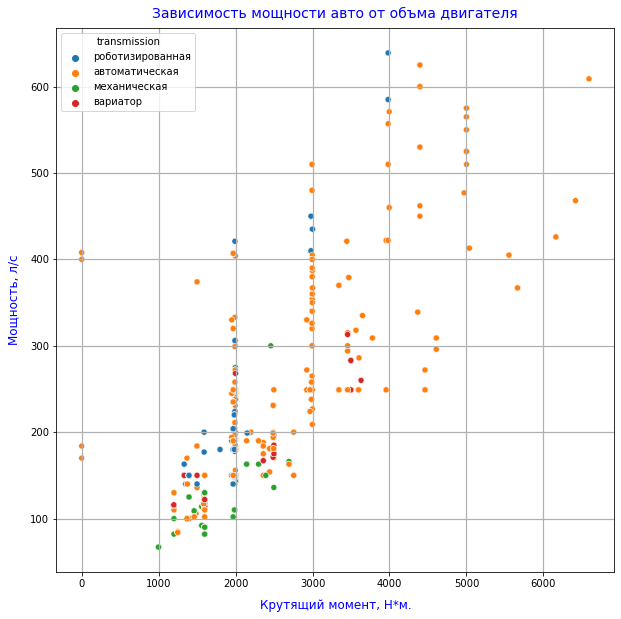

In [171]:
# Создаем полотно
plt.figure(figsize=(10, 10))
#plt.scatter(df['engin_volume'], df['power'])
sns.scatterplot(data=df, x='engin_volume', y='power', hue='transmission')
# Название осей
plt.xlabel('Крутящий момент, Н*м.', fontsize=12, color='blue', labelpad=10)
plt.ylabel('Мощность, л/с', fontsize=12, color='blue', labelpad=10)
# Название графика
plt.title('Зависимость мощности авто от объма двигателя', fontsize=14, color='blue', pad=10)
# Параметры сетки
plt.grid(which='major', linewidth=1.2) # Главная 
plt.grid(which='minor', linestyle='--', color='gray', linewidth=0.5) # Вспомогательная
#plt.minorticks_on(); # Включить показ минорной сетки

In [169]:
df

,brand,model,complect,type_car,seats,doors,engine,power,engine_torque,transmission,...,trunk_vol,max_trunk_vol,fuel_tank,vehicle_weight,main_type_car,brand_cod,model_cod,engin_type,engin_type_cod,engin_volume
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,5,бензиновый (1395 см³),150,250,роботизированная,...,425 л,880 л,50 л,1320 кг,sedan,0,20,бензиновый,0,1395.0
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,5,бензиновый (1395 см³),150,250,роботизированная,...,425 л,880 л,50 л,1320 кг,sedan,0,20,бензиновый,0,1395.0
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,5,бензиновый (1984 см³),190,320,роботизированная,...,425 л,880 л,50 л,1395 кг,sedan,0,20,бензиновый,0,1984.0
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,5,бензиновый (1984 см³),190,320,роботизированная,...,390 л,845 л,55 л,1465 кг,sedan,0,20,бензиновый,0,1984.0
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,5,бензиновый (1984 см³),190,320,роботизированная,...,425 л,880 л,50 л,1395 кг,sedan,0,20,бензиновый,0,1984.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,Volvo,XC90,D5 AT 5S R-Design,Большой кроссовер,5,5,дизельный (1969 см³),235,480,автоматическая,...,721 л,1899 л,71 л,1969 кг,crossover,26,232,дизельный,2,1969.0
1699,Volvo,XC90,T6 AT 7S R-Design,Большой кроссовер,7,5,бензиновый (1969 см³),320,400,автоматическая,...,692 л,1899 л,71 л,2004 кг,crossover,26,232,бензиновый,0,1969.0
1700,Volvo,XC90,D5 AT 7S R-Design,Большой кроссовер,7,5,дизельный (1969 см³),235,480,автоматическая,...,692 л,1899 л,71 л,2009 кг,crossover,26,232,дизельный,2,1969.0
1701,Volvo,XC90,T8 AT 7S Inscription,Большой кроссовер,7,5,гибридный (1969 см³),407,640,автоматическая,...,640 л,1899 л,70 л,2350 кг,crossover,26,232,гибридный,1,1969.0


In [35]:
X = df_for.drop('main_type_car', axis=1)
y = df_for['main_type_car']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_tets = train_test_split(X, y, test_size = 0.3)

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
tree= DecisionTreeClassifier(max_depth=5)

In [42]:
tree.fit(X_train, y_train)

ValueError: could not convert string to float: 'BMW'